<a href="https://colab.research.google.com/github/Himanshu-1703/Feature-Engineering/blob/main/Outliers/Outlier_detection_and_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### What are Outliers?
Values that deviate from another values are called as outliers.

- Outliers are good in case of fraud detection, cyber security and medical related situations.
- Outliers depend on the basis of problem statement, we do not blindly remove the outliers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Which machine learning models are sensitive to outliers?

1. Naive Bayes classifier - Not sensitive to outliers.
2. SVM - Not sensitive to outliers.
3. Linear Regression - Sensitive to outliers.
4. Logistic regression - Sensitive to outliers.
5. Decision tree Regressor and Classifier - Not sensitive to outliers.
6. Ensemble methods - Not sensitive to outliers.
7. KNN - Sensitive to outliers.(May or may not depending on the value of k)
8. K means - Sensitive to outliers.
9. Hierarichal - Sensitive to outliers.
10. PCA - Very very sensitive (Higher variance in the column due to outliers)
11. Neural Networks - Sensitive to outliers.

In [ ]:
path = '/content/drive/MyDrive/csv files/titanic_krish.csv'

df = pd.read_csv(path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# check for missing values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

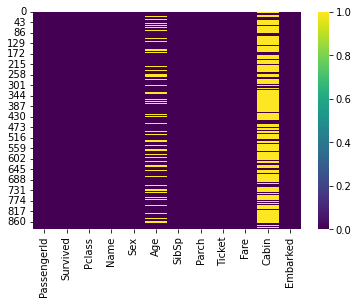

In [ ]:
# plot the missing values

sns.heatmap(df.isna(),cmap='viridis')
plt.show()

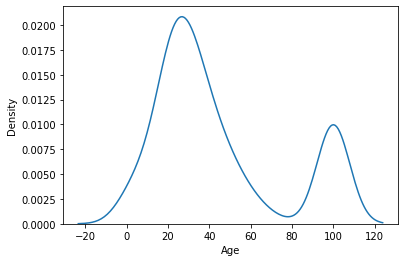

In [ ]:
# visualize outliers

sns.kdeplot(df['Age'].fillna(100))
plt.show()

The age value around 100 is considered to be an outlier.

### When the data is normally distributed (Gaussian Distribution):

- We detect the outliers using 3 std from the mean.
- Any values above the 3 Std away from the mean are detected as outliers.

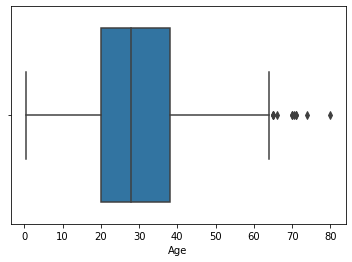

In [ ]:
# boxplot for the age column

sns.boxplot(x='Age',data=df)
plt.show()

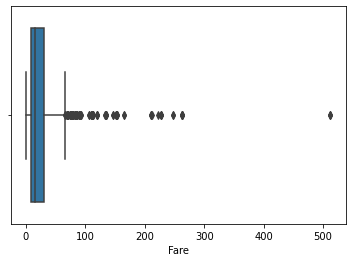

In [ ]:
# boxplot for the fare column

sns.boxplot(x='Fare',data=df)
plt.show()

In [ ]:
# check the skew for the Age column
df[['Age','Fare']].skew()

Age     0.389108
Fare    4.787317
dtype: float64

- The fare column is highly skewed.
- The age column is near to normal distribution.

In [ ]:
# statistical description of the age column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The age column follows a gaussian distribution, we can calculate the upper annd lower limit for the outliers using the mean + 3std formula.

In [ ]:
# Outlier detection for the age column

age_mean = df['Age'].mean()
age_std = df['Age'].std()
upper_limit = age_mean + (3*age_std)
lower_limit = age_mean - (3*age_std)

print('The upper limit for the age column is',upper_limit)
print('The lower limit for the age column is',lower_limit)

The upper limit for the age column is 73.27860964406094
The lower limit for the age column is -13.880374349943303


Any values in the age column above the value of 73 is considered to an outlier

In [ ]:
# outliers in age column

df[df['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


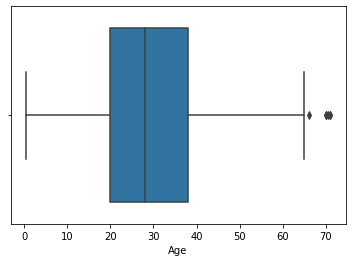

In [ ]:
# remove the outliers

age_trans = df[df['Age'] <= upper_limit].copy()

# plot the boxplot after removing outliers

sns.boxplot(x='Age',data=age_trans)
plt.show()

In [ ]:
# check for age values greater than the upper limit

age_trans[age_trans['Age'] > upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


The outliers have been removed from the age column

In [ ]:
# IQR for the age column

age_per_75,age_per_25 = df['Age'].quantile([0.75,0.25])

IQR = age_per_75 - age_per_25

IQR

17.875

In [ ]:
upper_limit = age_per_75 + (1.5*IQR)
lower_limit = age_per_25 - (1.5*IQR)

print('The upper limit is',upper_limit)
print('The lower limit is',lower_limit)

The upper limit is 64.8125
The lower limit is -6.6875


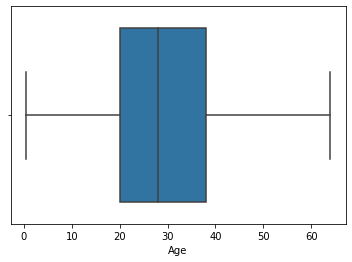

In [ ]:
# trim the values from the age column based on IQR

age_trans = df[df['Age'] <= upper_limit]

# plot the boxplot

sns.boxplot(x='Age',data=age_trans)
plt.show()

**Extreme outliers are removed using the IQR with fold=3 strategy. In this way the extreme otliers of the data can be detected very easily.**

**NOTE**

- It is advisable to use the std technique when the data is normal or near to normal distribution.
- When the data is skewed then it is advised to use the IQR technique.
- When the data is highly skewed then it is advised to use the the extreme outliers technique where the fold is kept as 3. 

In [ ]:
# Detect outlier boundaries in the fare column

fare_per_75,fare_per_25 = df['Fare'].quantile([0.75,0.25])
IQR = fare_per_75 - fare_per_25

upper_limit = fare_per_75 + (1.5 * IQR)
lower_limit = fare_per_25 - (1.5 * IQR)

print('The upper limit is',upper_limit)
print('The lower limit is ',lower_limit)


upper_limit_ex = fare_per_75 + (3 * IQR)
lower_limit_ex = fare_per_25 - (3 * IQR)

print('The upper limit is',upper_limit_ex)
print('The lower limit is ',lower_limit_ex)

The upper limit is 65.6344
The lower limit is  -26.724
The upper limit is 100.2688
The lower limit is  -61.358399999999996


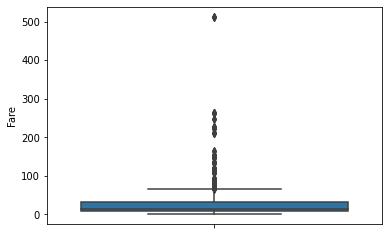

In [ ]:
# plot the boxplot for fare column

sns.boxplot(y='Fare',data=df)
plt.show()

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 19.9 MB/s eta 0:00:00


In [ ]:
# cap outliers in the age and fare columns

from feature_engine.outliers import Winsorizer

win_age = Winsorizer(capping_method='gaussian',tail='right',fold=3)
win_fare = Winsorizer(capping_method='iqr',tail='right',fold=3)

age_trans = win_age.fit_transform(df['Age'].dropna().values.reshape(-1,1))
fare_trans = win_fare.fit_transform(df[['Fare']])

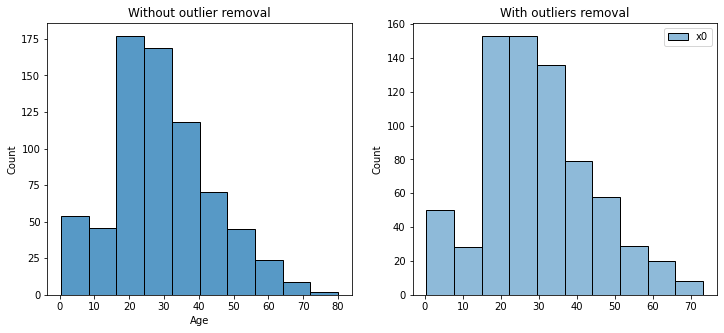

In [ ]:
# plot the graphs of the age column

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(x='Age',data=df,bins=10)
plt.title('Without outlier removal')

plt.subplot(1,2,2)
sns.histplot(age_trans,bins=10)
plt.title('With outliers removal')
plt.show()

The outliers that were greater than the upper boundary have been capped.

In [ ]:
fare_trans

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


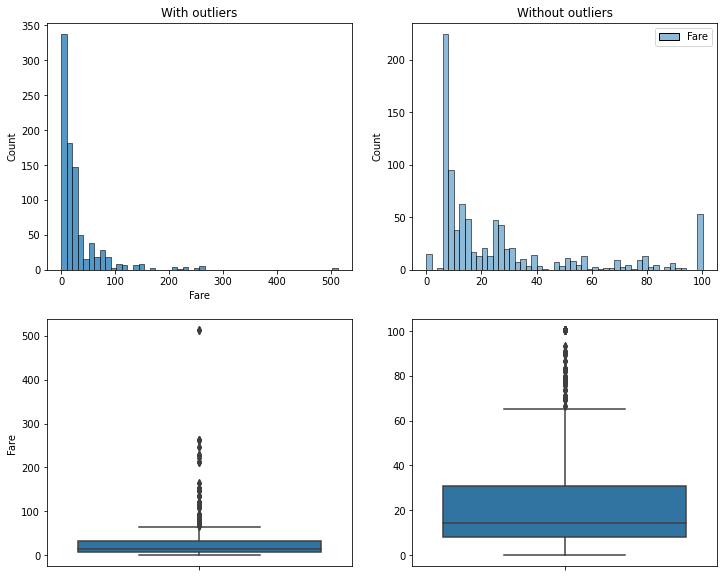

In [ ]:
# plot boxplots for the fare column

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.histplot(x='Fare',data=df,bins=50)
plt.title('With outliers')

plt.subplot(2,2,2)
sns.histplot(fare_trans,bins=50)
plt.title('Without outliers')

plt.subplot(2,2,3)
sns.boxplot(y='Fare',data=df)

plt.subplot(2,2,4)
sns.boxplot(y=fare_trans.values)

plt.show()

The extreme outliers from the fare column are capped to the upper limit value.
- Can be observed by visualizing the histogram.